# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units='imperial'

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # set up lists to hold reponse info
lat = []
temp = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country = []
date = []
weather_city=[]


for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        temp_max.append(weather_response ['main']['temp_max'])
        humidity.append(weather_response ['main']['humidity'])
        clouds.append(weather_response ['clouds']['all'])
        speed.append(weather_response ['wind']['speed'])
        country.append(weather_response ['sys']['country'])
        date.append(weather_response ['dt'])
        weather_city.append(city)
        print(f"processing {city}")
        
    except(KeyError):
        print('missing field skip')

processing biak
processing shimoda
processing rikitea
processing tromso
processing port blair
processing bluff
processing pahalgam
processing port alfred
processing ouesso
processing coquimbo
processing cidreira
processing puerto ayora
processing butaritari
processing norman wells
processing lavrentiya
processing dunedin
processing cape town
processing new norfolk
processing adrar
missing field skip
processing bull savanna
missing field skip
processing aksarka
processing kodiak
processing husavik
processing punta arenas
processing tecoanapa
processing yar-sale
processing la romana
missing field skip
processing port hawkesbury
processing ngunguru
processing atuona
processing upernavik
processing hermanus
processing bengkulu
processing avarua
missing field skip
processing ushuaia
processing khartoum
processing lompoc
processing erenhot
processing kulhudhuffushi
processing esperance
processing nikolskoye
processing mahebourg
missing field skip
missing field skip
processing springbok
proce

processing tiznit
processing iralaya
processing kutum
processing sorong
processing chumikan
processing beckley
processing nurota
processing denpasar
processing alekseyevskaya
processing davidson
processing mangla
processing sola
processing san fernando
processing tacuarembo
processing puerto leguizamo
processing weihe
processing mackay
processing emba
processing sisimiut
processing strezhevoy
processing balkanabat
processing kahului
processing isangel
processing flinders
processing kiunga
processing delijan
processing kendari
processing mahenge
processing pokhara
processing keroka
missing field skip
processing bandarbeyla
processing mount gambier
processing sidi ali
processing lagoa
processing oranjestad
processing santa cruz
processing krasnyy chikoy
processing nhulunbuy
processing yulara
missing field skip
processing torbay
processing hinganghat
processing lagunas
processing constitucion
processing cabo san lucas
processing neepawa
processing shitanjing
processing tuim
processing mou

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create city data frame
city_dict={
    "City":cities,
    "Lat":lat,
    "Lng":lon,
    "Max Temp":temp_max,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame.from_dict(city_dict, orient='index')
weather_data=weather_data.transpose()

In [11]:
# Remove null values
#add csv file
weather_data=weather_data.dropna()
#weather_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)
weather_data.to_csv('output/cities.csv', index=False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,biak,-0.9131,122.877,80.67,76,96,3.22,ID,1618461958
1,shimoda,34.6667,138.95,55.4,47,75,9.22,JP,1618461958
2,rikitea,-23.1203,-134.969,78.57,72,13,8.68,PF,1618461805
3,tromso,69.6496,18.957,33.8,93,90,17.27,NO,1618461959
4,port blair,11.6667,92.75,85.68,66,100,4.97,IN,1618461904
...,...,...,...,...,...,...,...,...,...
566,palabuhanratu,32.7593,-97.7972,59,89,100,5.01,US,1618462165
567,ucluelet,42.4308,130.643,49.12,43,75,12.62,RU,1618462165
568,puerto escondido,34.1743,-97.1436,54,94,90,10.36,US,1618462165
569,bria,7.9868,117.064,84.81,68,68,9.84,PH,1618462166


In [12]:
#update weather format, remove duplicates
weather_update = weather_data[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].astype(float)
weather_city=weather_data[['City', 'Country', 'Lat', 'Lng']]
weather_combo=pd.merge(weather_city, weather_update, on='Lat', how='inner')
duplicateweather=weather_combo.loc[weather_combo.duplicated(subset=['City']),'City']
weather2=weather_combo[weather_combo['City'].isin(duplicateweather)==False]
del weather2['Lng_y']
weather2=weather2.rename(columns={'Lng_x':'Lng'})
weather2

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,biak,ID,-0.9131,122.877,80.67,76.0,96.0,3.22,1.618462e+09
1,shimoda,JP,34.6667,138.95,55.40,47.0,75.0,9.22,1.618462e+09
2,rikitea,PF,-23.1203,-134.969,78.57,72.0,13.0,8.68,1.618462e+09
3,tromso,NO,69.6496,18.957,33.80,93.0,90.0,17.27,1.618462e+09
4,port blair,IN,11.6667,92.75,85.68,66.0,100.0,4.97,1.618462e+09
...,...,...,...,...,...,...,...,...,...
574,palabuhanratu,US,32.7593,-97.7972,59.00,89.0,100.0,5.01,1.618462e+09
575,ucluelet,RU,42.4308,130.643,49.12,43.0,75.0,12.62,1.618462e+09
576,puerto escondido,US,34.1743,-97.1436,54.00,94.0,90.0,10.36,1.618462e+09
577,bria,PH,7.9868,117.064,84.81,68.0,68.0,9.84,1.618462e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
#summarize data
weatherdescribe=weather2.describe()
weatherdescribe

,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,60.350622,68.824156,52.753108,7.698810,1.618462e+09
std,21.032572,22.544207,38.032031,5.272854,1.038666e+02
min,-13.990000,8.000000,0.000000,0.360000,1.618461e+09
25%,45.365000,57.000000,14.000000,3.935000,1.618462e+09
50%,63.000000,73.000000,60.000000,6.580000,1.618462e+09
75%,77.850000,87.000000,90.000000,10.360000,1.618462e+09
max,101.930000,100.000000,100.000000,39.710000,1.618462e+09


In [14]:
#reveiw for humidity above 100

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
CityTemp=weather2[['Lat','Max Temp']]
CityHumid=weather2[['Lat','Humidity']]
CityCloud=weather2[['Lat','Cloudiness']]
CityWind=weather2[['Lat','Wind Speed']]


## Latitude vs. Temperature Plot

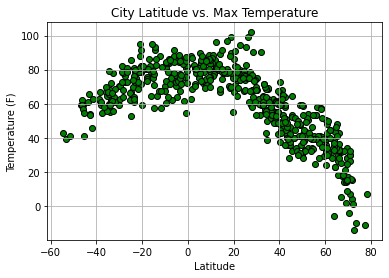

In [18]:
x_axis=CityTemp['Lat']
y_axis=CityTemp['Max Temp']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

## Latitude vs. Humidity Plot

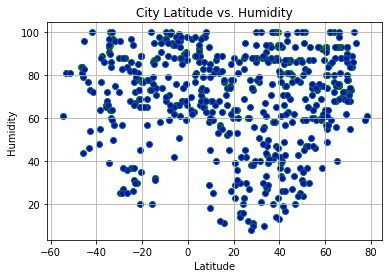

In [19]:
x_axis=CityHumid['Lat']
y_axis=CityHumid['Humidity']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="green")
plt.grid(True)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

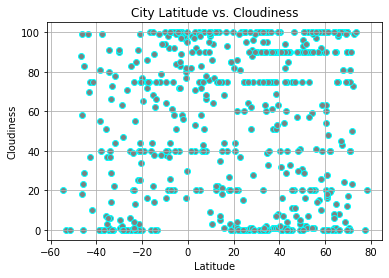

In [20]:
x_axis=CityCloud['Lat']
y_axis=CityCloud['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", facecolors='gray', edgecolors="cyan")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

## Latitude vs. Wind Speed Plot

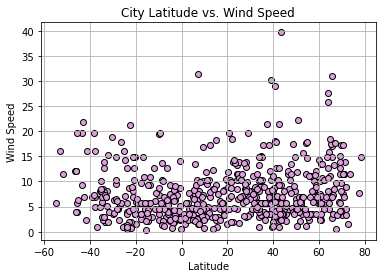

In [21]:
x_axis=CityWind['Lat']
y_axis=CityWind['Wind Speed']

plt.scatter(x_axis, y_axis, marker="o", facecolors='plum', edgecolors="black")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

## Linear Regression

In [26]:
Nweather1=weather2.loc[weather2['Lat']>0]
Sweather1=weather2.loc[weather2['Lat']<0]


In [27]:
Nweather = Nweather1[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].astype(float)
Sweather = Sweather1[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']].astype(float)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

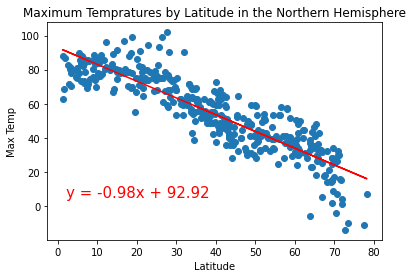

In [33]:
x_values=Nweather['Lat']
y_values=Nweather['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Maximum Tempratures by Latitude in the Northern Hemisphere')
plt.show()


Summary:
    In the northern hemisphere there is a correlletion between latitude and temperture.
    Closer to the equator (0 degrees) the tempreture is higher.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7880571627757024


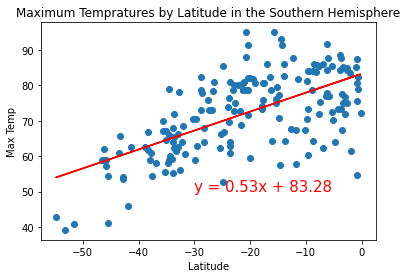

In [34]:
x_values=Sweather['Lat']
y_values=Sweather['Max Temp']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Maximum Tempratures by Latitude in the Southern Hemisphere')
plt.show()

Summary: in the southern hemisphere there is a correlation between latitude and tempreture, although the correlation doesn't seem to be as strong as in the northern hemisphere.  The higher tempertures are seen closest to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4083387414854285


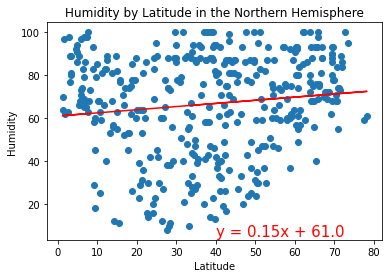

In [35]:
x_values=Nweather['Lat']
y_values=Nweather['Humidity']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.016042630346352907


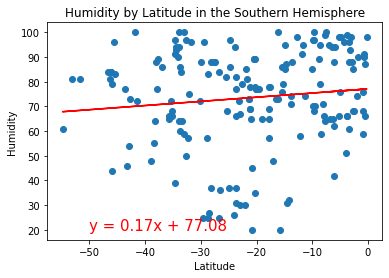

In [36]:
x_values=Sweather['Lat']
y_values=Sweather['Humidity']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity by Latitude in the Southern Hemisphere')
plt.show()

There does not seem to be a strong correlation between humidity and latitude in either the northern or southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.013051374961406119


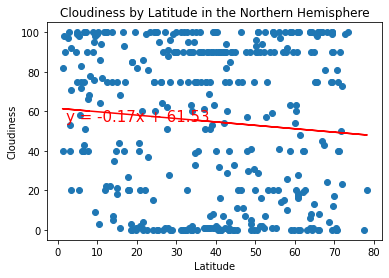

In [37]:
x_values=Nweather['Lat']
y_values=Nweather['Cloudiness']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,55),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.008093672081969084


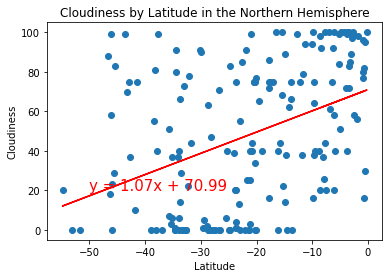

In [38]:
x_values=Sweather['Lat']
y_values=Sweather['Cloudiness']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness by Latitude in the Northern Hemisphere')
plt.show()

there does not seem to be a correlation between latitude and cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.16024197740725463


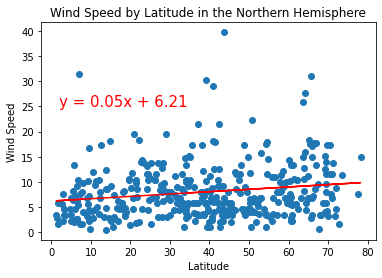

In [39]:
x_values=Nweather['Lat']
y_values=Nweather['Wind Speed']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in the Northern Hemisphere')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02991526156094948


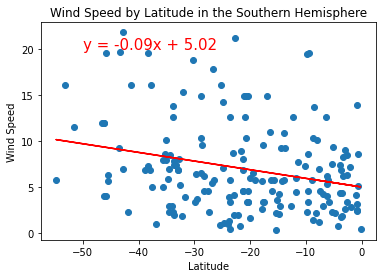

In [40]:
x_values=Sweather['Lat']
y_values=Sweather['Wind Speed']
print(f"The r-squared is: {rvalue**2}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed by Latitude in the Southern Hemisphere')
plt.show()